In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('titanic_train.csv')
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.850,NaN,S
537,538,1,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.425,NaN,C
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.0,0,0,112277,31.000,A31,C
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.000,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

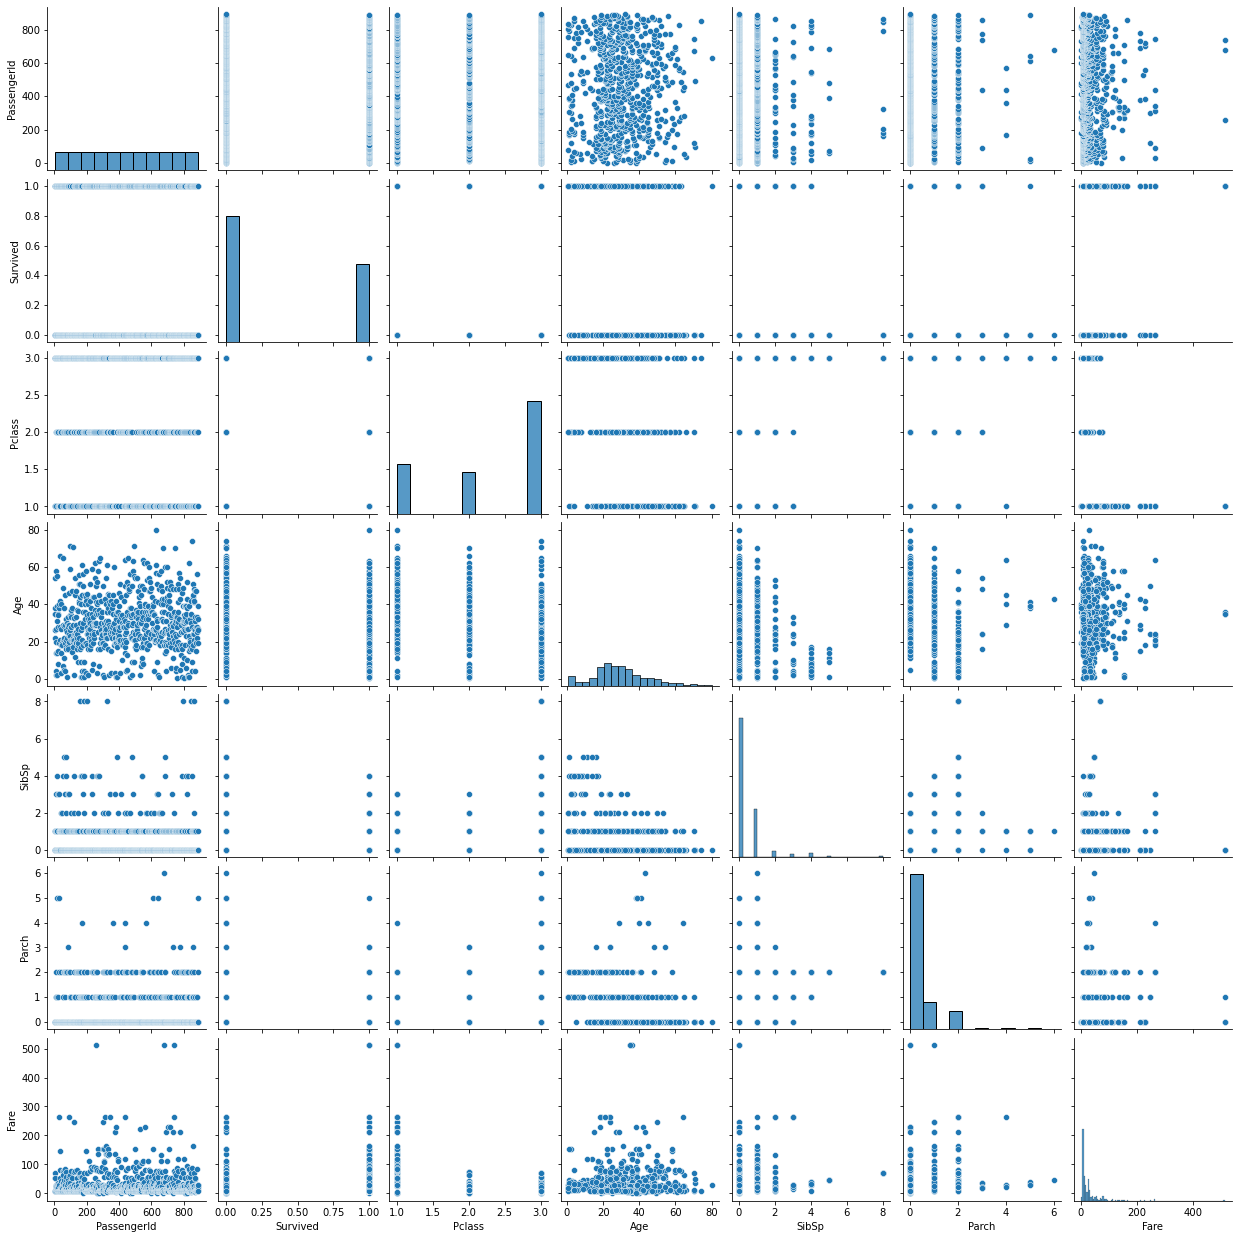

In [5]:
sns.pairplot(df)

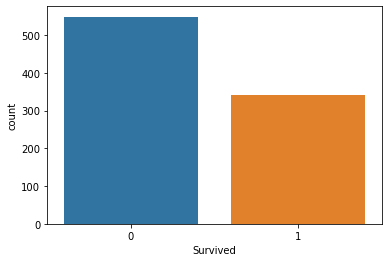

In [7]:
sns.countplot(x='Survived', data=df)

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

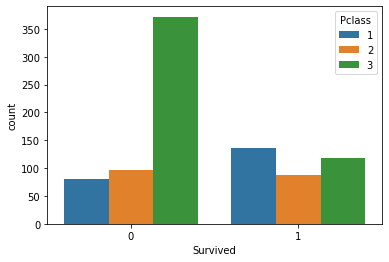

In [9]:
sns.countplot(x='Survived', data=df, hue='Pclass')

In [11]:
sns.set_style('whitegrid')

In [13]:
cat_cols = ['Pclass','Sex','SibSp','Parch','Embarked']

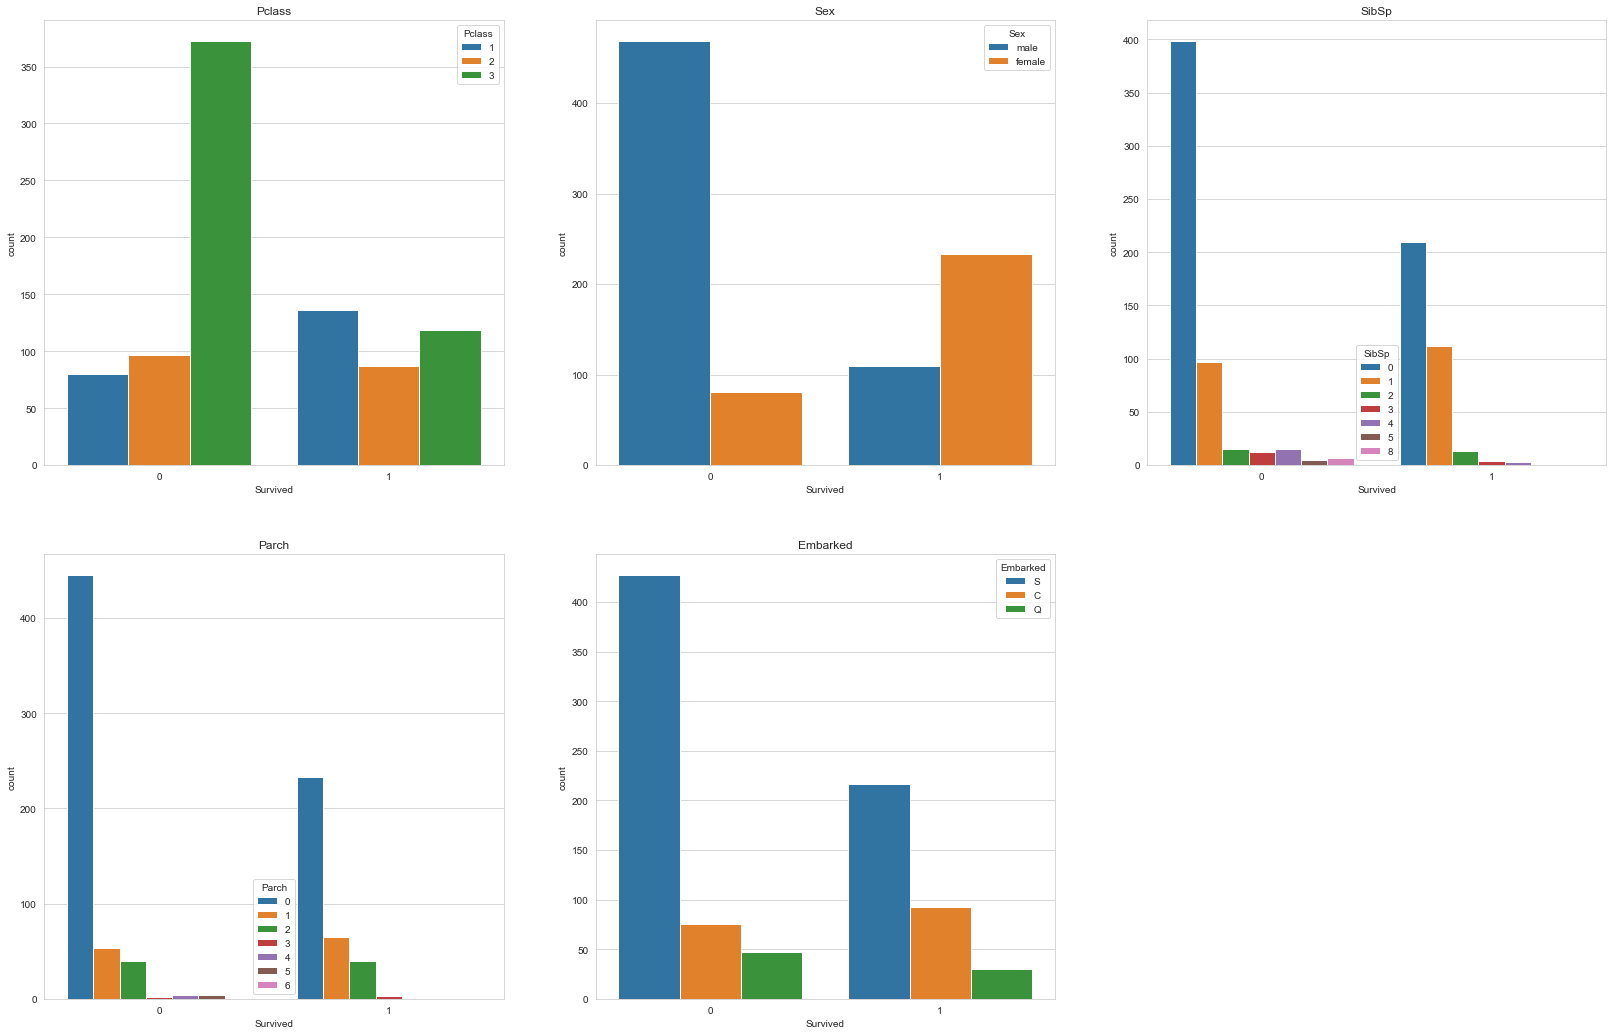

In [15]:
plt.figure(figsize=(28,18))
for i, col in enumerate(cat_cols):
    plt.subplot(2,3,i+1)
    sns.countplot(x='Survived', data=df, hue=col)
    plt.title(col)

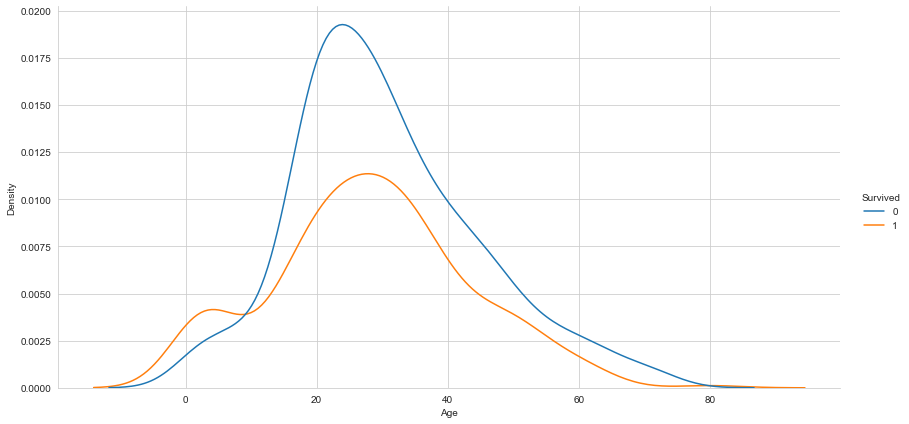

In [25]:
sns.displot(data=df,x='Age',hue='Survived',height=6,aspect=2,kind='kde')

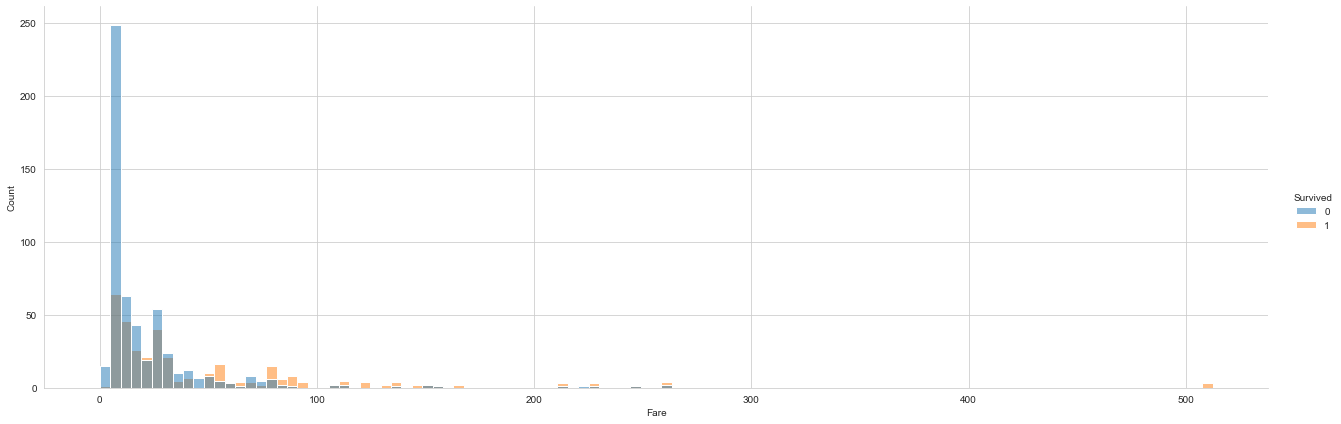

In [22]:
sns.displot(data=df,x='Fare',hue='Survived',height=6,aspect=3)

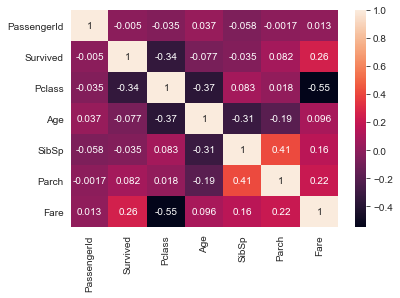

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
100*df.isnull().sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [30]:
df2 = df[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].copy()

In [31]:
100*df2.isnull().sum()/len(df2)

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64

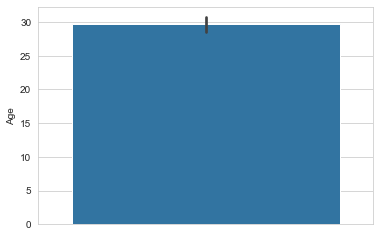

In [33]:
sns.barplot(y='Age',data=df2)

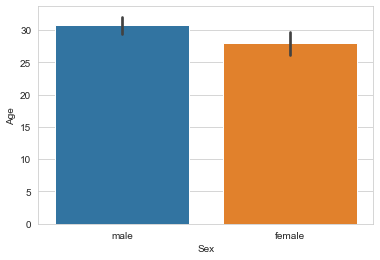

In [37]:
sns.barplot(x='Sex', y='Age', data=df2)

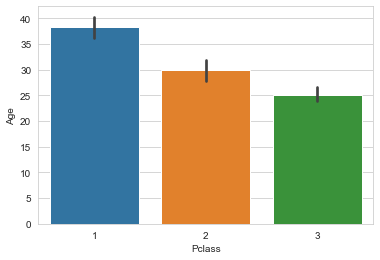

In [38]:
sns.barplot(x='Pclass', y='Age', data=df2)

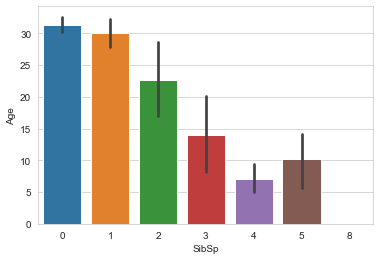

In [39]:
sns.barplot(x='SibSp', y='Age', data=df2)

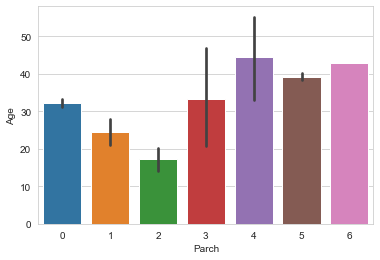

In [40]:
sns.barplot(x='Parch', y='Age', data=df2)

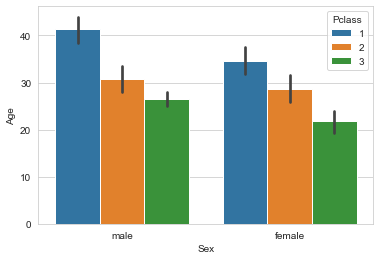

In [41]:
sns.barplot(x='Sex', y='Age', data=df2, hue='Pclass')

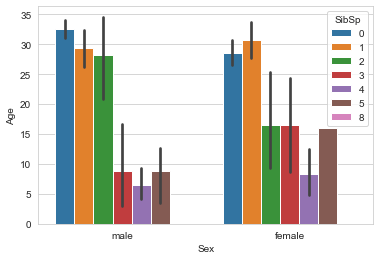

In [42]:
sns.barplot(x='Sex', y='Age', data=df2, hue='SibSp')

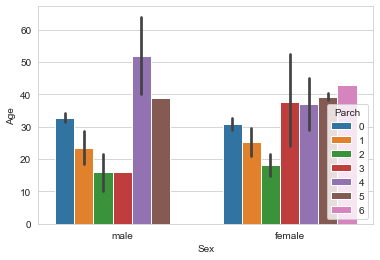

In [43]:
sns.barplot(x='Sex', y='Age', data=df2, hue='Parch')

In [44]:
def impute_age(d):
    age = d['Age']
    pclass = d['Pclass']
    sex = d['Sex']
    if pd.isnull(age):
        return df2['Age'][(df2['Sex']==sex)&(df2['Pclass']==pclass)].mean()
    return age

In [45]:
df2['Age'] = df2[['Age','Sex','Pclass']].apply(impute_age, axis=1)

In [46]:
100*df2.isnull().sum()/len(df2)

Survived    0.000000
Pclass      0.000000
Sex         0.000000
Age         0.000000
SibSp       0.000000
Parch       0.000000
Fare        0.000000
Embarked    0.224467
dtype: float64

In [47]:
df2.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
575,0,3,male,19.000000,0,0,14.5000,S
281,0,3,male,28.000000,0,0,7.8542,S
472,1,2,female,33.000000,1,2,27.7500,S
10,1,3,female,4.000000,1,1,16.7000,S
630,1,1,male,80.000000,0,0,30.0000,S
628,0,3,male,26.000000,0,0,7.8958,S
354,0,3,male,26.507589,0,0,7.2250,C
167,0,3,female,45.000000,1,4,27.9000,S
45,0,3,male,26.507589,0,0,8.0500,S
484,1,1,male,25.000000,1,0,91.0792,C


In [48]:
df2.dropna(axis=0, inplace=True)

In [49]:
100*df2.isnull().sum()/len(df2)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [51]:
x = df2.drop('Survived',axis=1)
y = df2['Survived']

In [54]:
sex = pd.get_dummies(x['Sex'],drop_first=True)
emb = pd.get_dummies(x['Embarked'])

In [64]:
pclass = pd.get_dummies(x['Pclass'],prefix='Pclass')
sibsp = pd.get_dummies(x['SibSp'],prefix='Sibsp')
parch = pd.get_dummies(x['Parch'],prefix='Parch')

In [66]:
x.drop(['Pclass','Sex','SibSp','Parch','Embarked'],axis=1,inplace=True)

In [67]:
x = pd.concat([x,sex,emb,pclass,sibsp,parch],axis=1)

In [69]:
x.head()

,Age,Fare,male,C,Q,S,Pclass_1,Pclass_2,Pclass_3,Sibsp_0,...,Sibsp_4,Sibsp_5,Sibsp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,22.0,7.2500,1,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,38.0,71.2833,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,26.0,7.9250,0,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
3,35.0,53.1000,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,35.0,8.0500,1,0,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=101)

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
model = LogisticRegression().fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
model.score(xtest, ytest)

0.8251121076233184

In [76]:
print(classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       136
           1       0.85      0.67      0.75        87

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223

